In [7]:
df.head()

,high,low,vol,chg,date,time
0,3325.4926,3322.8557,593851100,-2.1253,2015/10/8,9:30:00
1,3321.7106,3311.7765,281496200,-11.0792,2015/10/8,9:31:00
2,3310.4106,3308.4939,236541100,-3.1834,2015/10/8,9:32:00
3,3308.9903,3307.1725,188468100,0.1115,2015/10/8,9:33:00
4,3315.3184,3308.2525,178743200,6.3512,2015/10/8,9:34:00


In [61]:
df[np.logical_not(df['date'] <> "2015/10/8")].head()

,high,low,vol,chg,date,time
0,3325.4926,3322.8557,593851100,-2.1253,2015/10/8,9:30:00
1,3321.7106,3311.7765,281496200,-11.0792,2015/10/8,9:31:00
2,3310.4106,3308.4939,236541100,-3.1834,2015/10/8,9:32:00
3,3308.9903,3307.1725,188468100,0.1115,2015/10/8,9:33:00
4,3315.3184,3308.2525,178743200,6.3512,2015/10/8,9:34:00


In [42]:
__author__ = 'FENG Yutong'
__credits__='FANG Boyue'

'''The file is intended for VPIN calculation'''


import pandas
from math import *
import math
import numpy as np

def std(list):
    element = 0 
    for item in list:
        element = element + float((item**2)/( len(list)))
    return math.sqrt(element)

def phi(x):
    #'Cumulative distribution function for the standard normal distribution'
    return (1.0 + erf(x / sqrt(2.0))) / 2.0

def calx(v_i,delta_p_i,sigma):
    x = v_i * phi(delta_p_i/sigma)
    return x

def main():
    global df
    df = pandas.read_table("data.txt").dropna()

if __name__ == '__main__':
    main()

In [45]:
high = df["high"].tolist()
low = df["low"].tolist()
vol = df["vol"].tolist()
chg =df["chg"].tolist()
date = df["date"].tolist()
time = df["time"].tolist()
sigma = std(chg) #calculate standard deviation
totalvol = sum(vol)

In [72]:
dateset = tuple(set(date))
vpin=[]
for eachdate in dateset:
    dateslice = df[np.logical_not(df['date'] <> eachdate)]
    datevol = dataslice['vol'].sum()
    vbs = datevol/50
    
    '''list to store results'''
    delta_p_i = []
    v_i = []
    x=[]
    
    '''convert slice to list'''
    highslice = dateslice["high"].tolist()
    lowslice = dateslice["low"].tolist()
    volslice = dateslice["vol"].tolist()
    
    '''generate basket'''
    highbas=[]
    lowbas=[]
    volbas=[]
    
    '''start filling basket'''
    for i in range(len(dateslice.index)):
        highbas.append(highslice[i])
        lowbas.append(lowslice[i])
        volbas.append(volslice[i])
        '''pop last element if vol exceeds.'''
        if sum(volbas) > vbs:
            v_i.append(sum(volbas[0:-1]))  
            delta_p_i.append(abs(max(highbas)-min(lowbas)))
            highbas = highbas[-1:] 
            lowbas = lowbas[-1:]
            volbas = volbas[-1:]
    for i in range(len(v_i)):
        x.append(calx(v_i[i],delta_p_i[i],sigma))
    v_tau_b=sum(x)
    dateitem= abs(2*v_tau_b - vbs)
    vpin.append(dateitem/totalvol)    

In [62]:
x = list(set(date))
x.sort()
print(len(x))
print(len(vpin))

732
732


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\envs\py2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cosh', 'ldexp', 'hypot', 'tan', 'isnan', 'log', 'fabs', 'floor', 'sqrt', 'frexp', 'degrees', 'pi', 'log10', 'sin', 'fmod', 'copysign', 'cos', 'ceil', 'isinf', 'sinh', 'trunc', 'std', 'expm1', 'e', 'tanh', 'radians', 'modf', 'time', 'exp', 'log1p', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


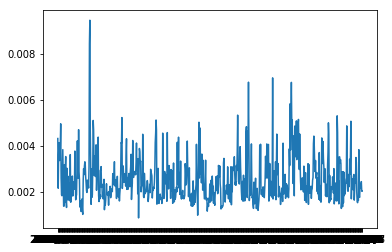

In [63]:
import matplotlib.pyplot as plt
import numpy as np
 
p1= x
p2= vpin
 
#创建绘图图表对象，可以不显式创建，跟cv2中的cv2.namedWindow()用法差不多
plt.figure('Draw')
plt.plot(p1,p2)  # plot绘制折线图
plt.draw()  # 显示绘图
plt.pause(5)  #显示5秒
plt.savefig("easyplot01.jpg")  #保存图象
plt.close()   #关闭图表

In [68]:
import xlrd
from xlrd import open_workbook
book = open_workbook('random.xls')
sheet1 = book.sheet_by_index(0)
data = vpin

for i in xrange(sheet1.nrows):
    data.append(sheet1.cell(i,1).value)